In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Завантаження попередньо підготовлених датасетів**

In [2]:
path_users = './data/Normalized_dataset_users.csv'
path_features = './data/Normalized_dataset_features.csv'
path_user_profiles = './data/User_Profiles.csv'
path_user_profiles_KMEANS = './data/User_Profiles_clusterized.csv'
path_user_profiles_Hierarchical = './data/User_Profiles_hierarchical_clusterized.csv'

In [3]:
df_users = pd.read_csv(path_users, on_bad_lines='skip')
df_users.shape

(9711301, 4)

In [4]:
df_features = pd.read_csv(path_features, on_bad_lines='skip')
df_features.shape

(50683, 18)

In [5]:
df_profiles = pd.read_csv(path_user_profiles, on_bad_lines='skip', index_col='Unnamed: 0')
df_profiles.shape

(1000, 12)

In [6]:
df_profiles.sample()

danceability   energy       key  \
c7ac56114cefd8af85f3dd5522ac31406f345d2c       0.50044  0.56874  0.508914   

                                          loudness      mode  speechiness  \
c7ac56114cefd8af85f3dd5522ac31406f345d2c  0.798333  0.745631     0.055519   

                                          acousticness  instrumentalness  \
c7ac56114cefd8af85f3dd5522ac31406f345d2c      0.341901          0.311395   

                                          liveness   valence     tempo  \
c7ac56114cefd8af85f3dd5522ac31406f345d2c  0.219854  0.357809  0.520812   

                                          time_signature  
c7ac56114cefd8af85f3dd5522ac31406f345d2c        0.773981

додамо до датафрейму користувачів дані про їх кластер

In [7]:
df_kmeans = pd.read_csv(path_user_profiles_KMEANS, on_bad_lines='skip', index_col='user_id')

In [8]:
df_profiles['cluster_kmeans'] = df_kmeans['cluster_k_5']

In [9]:
df_users = df_users.merge(df_kmeans[['cluster_k_5']], left_on='user_id', right_index=True, how='inner')

In [10]:
df_users.columns = ['track_id', 'user_id', 'playcount', 'playcount_norm', 'cluster_kmeans']

In [11]:
df_hier = pd.read_csv(path_user_profiles_Hierarchical, on_bad_lines='skip', index_col='user_id')

In [12]:
df_profiles['cluster_hierarchical'] = df_hier['cluster']

In [13]:
df_users = df_users.merge(df_hier[['cluster']], left_on='user_id', right_index=True, how='inner')

In [14]:
df_users.columns = ['track_id', 'user_id', 'playcount', 'playcount_norm', 'cluster_kmeans',
       'cluster_hierarchical']

In [15]:
df_profiles.sample()

danceability    energy       key  \
4a8b9920f4b0294246232856bf51337deff07c86      0.524843  0.701123  0.471495   

                                          loudness      mode  speechiness  \
4a8b9920f4b0294246232856bf51337deff07c86  0.825559  0.766949     0.055983   

                                          acousticness  instrumentalness  \
4a8b9920f4b0294246232856bf51337deff07c86       0.18773          0.132628   

                                          liveness   valence     tempo  \
4a8b9920f4b0294246232856bf51337deff07c86    0.1801  0.449385  0.538609   

                                          time_signature  cluster_kmeans  \
4a8b9920f4b0294246232856bf51337deff07c86        0.781356               3   

                                          cluster_hierarchical  
4a8b9920f4b0294246232856bf51337deff07c86                     1

In [16]:
df_profiles['cluster_kmeans'].unique(), df_profiles['cluster_hierarchical'].unique()

(array([2, 3, 1, 4, 0], dtype=int64), array([1, 2, 0, 3], dtype=int64))

# **Рекомендації вручну**

## оберемо користувача

In [17]:
random_user = df_users.sample()
random_user_id = random_user['user_id'].values[0]
random_user

track_id                                   user_id  \
4271396  TRDIIJW128F429D57C  ea40665a735ded318aacb766ef2c88f2896beb54   

         playcount  playcount_norm  cluster_kmeans  cluster_hierarchical  
4271396          2        0.000339               1                     1

## створимо матрицю користувач-трек з урахуванням кластерів

In [18]:
# cluster_type = ['kmeans', 'hierarchical']
def create_user_track_matrix(user, df_users, cluster_type, cluster_number):
    data = df_users[df_users['cluster_kmeans'] == cluster_number] if cluster_type == 'kmeans' else df_users[df_users['cluster_hierarchical'] == cluster_number]
    user_track_matrix= pd.pivot_table(
        data=data,
        columns='track_id',
        index='user_id',
        values='playcount',
        fill_value=0
    )
    return user_track_matrix

## **Створення матриць користувач-трек для кластерів kmeans**

In [19]:
user_track_matrix_kmeans_zero = create_user_track_matrix(user=random_user, df_users=df_users, cluster_type='kmeans', cluster_number=0)
user_track_matrix_kmeans_one = create_user_track_matrix(user=random_user, df_users=df_users, cluster_type='kmeans', cluster_number=1)
user_track_matrix_kmeans_two = create_user_track_matrix(user=random_user, df_users=df_users, cluster_type='kmeans', cluster_number=2)
user_track_matrix_kmeans_three = create_user_track_matrix(user=random_user, df_users=df_users, cluster_type='kmeans', cluster_number=3)
user_track_matrix_kmeans_four = create_user_track_matrix(user=random_user, df_users=df_users, cluster_type='kmeans', cluster_number=4)

kmeans_clusters_matrix = {
    0: user_track_matrix_kmeans_zero,
    1: user_track_matrix_kmeans_one,
    2: user_track_matrix_kmeans_two,
    3: user_track_matrix_kmeans_three,
    4: user_track_matrix_kmeans_four
}

## **Створення матриць користувач-трек для ієрархічних кластерів**

In [22]:
user_track_matrix_hierarchical_zero = create_user_track_matrix(user=random_user, df_users=df_users, cluster_type='hierarchical', cluster_number=0)
user_track_matrix_hierarchical_one = create_user_track_matrix(user=random_user, df_users=df_users, cluster_type='hierarchical', cluster_number=1)
user_track_matrix_hierarchical_two = create_user_track_matrix(user=random_user, df_users=df_users, cluster_type='hierarchical', cluster_number=2)
user_track_matrix_hierarchical_three = create_user_track_matrix(user=random_user, df_users=df_users, cluster_type='hierarchical', cluster_number=3)

hierarchical_clusters_matrix = {
    0: user_track_matrix_hierarchical_zero,
    1: user_track_matrix_hierarchical_one,
    2: user_track_matrix_hierarchical_two,
    3: user_track_matrix_hierarchical_three
}

## Обчислення схожості між користувачами

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
def count_similarity(matrix):
    user_similarity_cossine = cosine_similarity(matrix)
    return pd.DataFrame(user_similarity_cossine, index=matrix.index, columns=matrix.index)

In [28]:
user_similarity_df_kmeans_zero = count_similarity(kmeans_clusters_matrix[0])
user_similarity_df_kmeans_one = count_similarity(kmeans_clusters_matrix[1])
user_similarity_df_kmeans_two = count_similarity(kmeans_clusters_matrix[2])
user_similarity_df_kmeans_three = count_similarity(kmeans_clusters_matrix[3])
user_similarity_df_kmeans_four = count_similarity(kmeans_clusters_matrix[4])

kmeans_clusters_similarity_matrix = {
    0: user_similarity_df_kmeans_zero,
    1: user_similarity_df_kmeans_one,
    2: user_similarity_df_kmeans_two,
    3: user_similarity_df_kmeans_three,
    4: user_similarity_df_kmeans_four
}

In [29]:
user_similarity_df_hierarchical_zero = count_similarity(hierarchical_clusters_matrix[0])
user_similarity_df_hierarchical_one = count_similarity(hierarchical_clusters_matrix[1])
user_similarity_df_hierarchical_two = count_similarity(hierarchical_clusters_matrix[2])
user_similarity_df_hierarchical_three = count_similarity(hierarchical_clusters_matrix[3])

hierarchical_clusters_similarity_matrix = {
    0: user_similarity_df_hierarchical_zero,
    1: user_similarity_df_hierarchical_one,
    2: user_similarity_df_hierarchical_two,
    3: user_similarity_df_hierarchical_three,
}

## Передбачення кількості прослуховувань

In [70]:
def predict_playcount_kmeans(user_id, track_id, df_users,
                             user_track_matrix_dict=kmeans_clusters_matrix, 
                             user_similarity_df_dict=kmeans_clusters_similarity_matrix, 
                             n_similar_users=20):
    # отримання даних про кластер користувача
    user_cluster = df_users[df_users['user_id'] == user_id].head()['cluster_kmeans'].values[0]
    user_track_matrix = user_track_matrix_dict[user_cluster]
    user_similarity_df = user_similarity_df_dict[user_cluster]
    
    if track_id not in user_track_matrix.columns:
        return 0.0

    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:n_similar_users+1]

    numerator = 0.0
    denominator = 0.0

    for sim_user_id, similarity in similar_users.items():
        user_play = user_track_matrix.at[sim_user_id, track_id]
        numerator += similarity * user_play
        denominator += abs(similarity)

    if denominator == 0:
        return 0.0
    return numerator / denominator

In [89]:
user_id = 'afe2eaf83795de7396348a8881347e853d3db991'
track_id = 'TRMNVLK128F930F4AF'

predicted_playcount = predict_playcount_kmeans(user_id, track_id, df_users, kmeans_clusters_matrix, kmeans_clusters_similarity_matrix)
print(f"Передбачений playcount для користувача {user_id} і треку {track_id}: {predicted_playcount:.4f}")

Передбачений playcount для користувача afe2eaf83795de7396348a8881347e853d3db991 і треку TRMNVLK128F930F4AF: 1.2749


In [90]:
def predict_playcount_hierarchical(user_id, track_id, df_users,
                             user_track_matrix_dict=hierarchical_clusters_matrix, 
                             user_similarity_df_dict=hierarchical_clusters_similarity_matrix, 
                             n_similar_users=20):
    # отримання даних про кластер користувача
    user_cluster = df_users[df_users['user_id'] == user_id].head()['cluster_hierarchical'].values[0]
    user_track_matrix = user_track_matrix_dict[user_cluster]
    user_similarity_df = user_similarity_df_dict[user_cluster]
    
    if track_id not in user_track_matrix.columns:
        return 0.0

    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:n_similar_users+1]

    numerator = 0.0
    denominator = 0.0

    for sim_user_id, similarity in similar_users.items():
        user_play = user_track_matrix.at[sim_user_id, track_id]
        numerator += similarity * user_play
        denominator += abs(similarity)

    if denominator == 0:
        return 0.0
    return numerator / denominator

In [91]:
user_id = 'afe2eaf83795de7396348a8881347e853d3db991'
track_id = 'TRMNVLK128F930F4AF'

predicted_playcount = predict_playcount_hierarchical(user_id, track_id, df_users, hierarchical_clusters_matrix, hierarchical_clusters_similarity_matrix)
print(f"Передбачений playcount для користувача {user_id} і треку {track_id}: {predicted_playcount:.4f}")

Передбачений playcount для користувача afe2eaf83795de7396348a8881347e853d3db991 і треку TRMNVLK128F930F4AF: 1.2749


In [92]:
def predict_playcount(user_id, track_id, user_track_matrix, user_similarity_df, n_similar_users=20):
    if track_id not in user_track_matrix.columns:
        return 0.0

    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:n_similar_users+1]

    numerator = 0.0
    denominator = 0.0

    for sim_user_id, similarity in similar_users.items():
        user_play = user_track_matrix.at[sim_user_id, track_id]
        numerator += similarity * user_play
        denominator += abs(similarity)

    if denominator == 0:
        return 0.0
    return numerator / denominator

In [93]:
user_id = 'afe2eaf83795de7396348a8881347e853d3db991'
track_id = 'TRMNVLK128F930F4AF'

predicted_playcount = predict_playcount(user_id, track_id, kmeans_clusters_matrix[3], kmeans_clusters_similarity_matrix[3])
print(f"Передбачений playcount для користувача {user_id} і треку {track_id}: {predicted_playcount:.4f}")

Передбачений playcount для користувача afe2eaf83795de7396348a8881347e853d3db991 і треку TRMNVLK128F930F4AF: 1.2749


## Так як результати обрахунків однакові, далі оберемо лише один метод кластерів, а саме kmeans

In [96]:
user_track_matrix = kmeans_clusters_matrix[0]
user_similarity_df = kmeans_clusters_similarity_matrix[0]
filled_matrix_kmeans_zero = user_track_matrix.copy()

for user_id in user_track_matrix.index:
    for track_id in user_track_matrix.columns:
        if user_track_matrix.at[user_id, track_id] == 0:
            predicted = predict_playcount(user_id, track_id, user_track_matrix, user_similarity_df)
            filled_matrix_kmeans_zero.at[user_id, track_id] = predicted

In [139]:
filled_matrix_kmeans_zero.to_csv('./data/filled_clustered/filled_kmeans_zero.csv')

In [144]:
def create_clustered_filled_matrix(cluster:int=1, file_name:str=''):
    user_track_matrix = kmeans_clusters_matrix[cluster]
    user_similarity_df = kmeans_clusters_similarity_matrix[cluster]
    filled_matrix_kmeans = user_track_matrix.copy()
    
    for user_id in user_track_matrix.index:
        for track_id in user_track_matrix.columns:
            if user_track_matrix.at[user_id, track_id] == 0:
                predicted = predict_playcount(user_id, track_id, user_track_matrix, user_similarity_df)
                filled_matrix_kmeans.at[user_id, track_id] = predicted
    filled_matrix_kmeans.to_csv(f'./data/filled_clustered/{file_name}.csv')
    return filled_matrix_kmeans

In [145]:
filled_matrix_kmeans_one = create_clustered_filled_matrix(1, 'filled_kmeans_one')

In [146]:
filled_matrix_kmeans_two = create_clustered_filled_matrix(2, 'filled_kmeans_two')

In [147]:
filled_matrix_kmeans_three = create_clustered_filled_matrix(3, 'filled_kmeans_three')

In [148]:
filled_matrix_kmeans_four = create_clustered_filled_matrix(4, 'filled_kmeans_four')

In [97]:
filled_matrix_kmeans_zero.shape, user_track_matrix.shape

((203, 8193), (203, 8193))

In [99]:
filled_matrix_kmeans_zero.sample()

track_id                                  TRAAAED128E0783FAB  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2                 0.0   

track_id                                  TRAABJS128F9325C99  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2                 0.0   

track_id                                  TRAACPH12903CF5F14  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2            0.193652   

track_id                                  TRAADCQ128F932EC14  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2                 0.0   

track_id                                  TRAADQW128F427CE68  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2                 0.0   

track_id                                  TRAADQX128F422B4CF  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2                 0.0   

track_id                                  TRAADVO128E07999E9  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2                 0.0   

track_id                                  TRAAFGQ128F427D884  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2                 0.0   

track_id                                  TRAAFOY128F146CC17  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2                 0.0   

track_id                                  TRAAGCZ128F93210FD  ...  \
user_id                                                       ...   
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2                 0.0  ...   

track_id                                  TRZZKGN128F42B5CC5  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2                 0.0   

track_id                                  TRZZKHE128F9311204  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2                 0.0   

track_id                                  TRZZKOL128F93112EF  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2            0.157625   

track_id                                  TRZZLTG128F146D6B0  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2                 0.0   

track_id                                  TRZZQGM128F9311E60  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2            0.031039   

track_id                                  TRZZSQU128F92FCDE8  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2                 0.0   

track_id                                  TRZZUBQ128F9351D51  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2            0.030741   

track_id                                  TRZZUTD12903CADD68  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2                 0.0   

track_id                                  TRZZYMU128E0792400  \
user_id                                                        
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2            0.031039   

track_id                                  TRZZZRJ128F42819AF  
user_id                                                       
b4f891cb48dfcf6fc0dd59ac92acb5fc1a81e4c2                 0.0  

[1 rows x 8193 columns]

In [100]:
user_track_matrix.sample()

track_id                                  TRAAAED128E0783FAB  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRAABJS128F9325C99  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRAACPH12903CF5F14  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRAADCQ128F932EC14  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRAADQW128F427CE68  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRAADQX128F422B4CF  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRAADVO128E07999E9  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRAAFGQ128F427D884  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRAAFOY128F146CC17  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRAAGCZ128F93210FD  ...  \
user_id                                                       ...   
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0  ...   

track_id                                  TRZZKGN128F42B5CC5  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZKHE128F9311204  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZKOL128F93112EF  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZLTG128F146D6B0  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZQGM128F9311E60  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZSQU128F92FCDE8  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZUBQ128F9351D51  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZUTD12903CADD68  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZYMU128E0792400  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZZRJ128F42819AF  
user_id                                                       
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0  

[1 rows x 8193 columns]

In [103]:
filled_matrix_kmeans_zero[filled_matrix_kmeans_zero.index == 'feee315cf240084e21428c7ddc41bed4c10b3c26']

track_id                                  TRAAAED128E0783FAB  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRAABJS128F9325C99  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26            0.096537   

track_id                                  TRAACPH12903CF5F14  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26            0.140209   

track_id                                  TRAADCQ128F932EC14  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26            0.043907   

track_id                                  TRAADQW128F427CE68  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26            0.054552   

track_id                                  TRAADQX128F422B4CF  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRAADVO128E07999E9  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRAAFGQ128F427D884  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRAAFOY128F146CC17  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRAAGCZ128F93210FD  ...  \
user_id                                                       ...   
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0  ...   

track_id                                  TRZZKGN128F42B5CC5  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZKHE128F9311204  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZKOL128F93112EF  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26            0.056572   

track_id                                  TRZZLTG128F146D6B0  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZQGM128F9311E60  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZSQU128F92FCDE8  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZUBQ128F9351D51  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZUTD12903CADD68  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZYMU128E0792400  \
user_id                                                        
feee315cf240084e21428c7ddc41bed4c10b3c26                 0.0   

track_id                                  TRZZZRJ128F42819AF  
user_id                                                       
feee315cf240084e21428c7ddc41bed4c10b3c26            0.046954  

[1 rows x 8193 columns]

# **Отримання рекомендацій**

In [104]:
def get_user_to_user_recommendations(user_track_matrix, user_df, user_id, limit):
    filtered_user_df = user_df[user_df['user_id'] == user_id]
    listened_tracks = filtered_user_df['track_id'].values

    user_matrix = user_track_matrix[user_track_matrix.index == user_id]
    not_zero_ratings = user_matrix.loc[:, (user_matrix != 0).all()]

    recommended_tracks = set(listened_tracks).symmetric_difference(not_zero_ratings.columns)
    filtered_user_row = not_zero_ratings[list(recommended_tracks)]
    top_recommendations = filtered_user_row.loc[:, filtered_user_row.loc[user_id].sort_values(ascending=False).head(limit).index]
    return top_recommendations

In [105]:
def get_features_of_recommended_tracks(recs, df_features):
    result = df_features.merge(recs.transpose(), on='track_id', how='inner')
    result.rename(columns={recs.index.values[0]: 'similarity'}, inplace=True)
    return result

In [150]:
ransom_user = df_users[df_users['cluster_kmeans'] == 3].sample()['user_id'].values[0]
res_matrix = get_user_to_user_recommendations(filled_matrix_kmeans_three, df_users, ransom_user, 20)
recommendations = get_features_of_recommended_tracks(res_matrix, df_features)

In [151]:
ransom_user

'5ef127be2845313b04cdab97eafd5bab866eaf35'

## Завантажемо попередньо сворений датасет з загальною матрицею

In [152]:
path_filled_matrix = './data/filled_dataset_user_track_matrix.csv'

In [161]:
df_filled_matrix = pd.read_csv(path_filled_matrix, on_bad_lines='skip', index_col='user_id')
df_filled_matrix.shape

(1000, 17347)

In [162]:
df_filled_matrix.sample()

TRAAAED128E0783FAB  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389                 0.0   

                                          TRAABJS128F9325C99  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389                 0.0   

                                          TRAACKM12903CE5BE9  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389                 0.0   

                                          TRAACPH12903CF5F14  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389            0.251548   

                                          TRAACZN128F93236B1  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389                 0.0   

                                          TRAACZR12903CDD291  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389                 0.0   

                                          TRAADCQ128F932EC14  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389                 0.0   

                                          TRAADNN128F42B1D94  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389                 0.0   

                                          TRAADQW128F427CE68  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389                 0.0   

                                          TRAADQX128F422B4CF  ...  \
user_id                                                       ...   
cfad9d362e9f86d92feec2fcc24665a48e016389                 0.0  ...   

                                          TRZZSQU128F92FCDE8  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389                 0.0   

                                          TRZZUBQ128F9351D51  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389            0.129536   

                                          TRZZUTD12903CADD68  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389            0.055166   

                                          TRZZXJT128F931D72C  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389                 0.0   

                                          TRZZXOQ128F932A083  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389                 0.0   

                                          TRZZXVN128F93285B4  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389                 0.0   

                                          TRZZYMU128E0792400  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389            0.038837   

                                          TRZZZCN128F9317A03  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389                 0.0   

                                          TRZZZHL128F9329CFB  \
user_id                                                        
cfad9d362e9f86d92feec2fcc24665a48e016389                 0.0   

                                          TRZZZRJ128F42819AF  
user_id                                                       
cfad9d362e9f86d92feec2fcc24665a48e016389             0.08906  

[1 rows x 17347 columns]

In [171]:
df_filled_matrix.columns.name = 'track_id'

In [172]:
res_matrix_general = get_user_to_user_recommendations(df_filled_matrix, df_users, ransom_user, 20)
recommendations_general = get_features_of_recommended_tracks(res_matrix_general, df_features)

# **Візуалізація рекомендованих треків на основі їхніх характеристик**

In [173]:
def plot_user_recommendation(users: pd.DataFrame, features: list, user_profile: pd.DataFrame = None):
    num_features = len(features)

    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False)
    angles = np.append(angles, angles[0])

    values_up = ''
    if user_profile is not None and not user_profile.empty:
        values_up = user_profile[features].values
        values_up = np.append(values_up[0], values_up[0][0])


    rows = (users.shape[0] + 4) // 5
    fig, axs = plt.subplots(rows, 5, figsize=(25, 10 * (rows // 2)), subplot_kw={'projection': 'polar'}, layout='constrained')
    fig.suptitle('Visualization of User Recommendations', fontsize=16, fontweight='bold')

    for i, (index, user) in enumerate(users.iterrows()):
        row = i // 5
        col = i % 5

        values = user[features].values
        values = np.append(values, values[0])

        ax = axs[row, col]
        ax.fill(angles, values, color='maroon', alpha=0.25)
        ax.plot(angles, values, color='maroon', linewidth=2)

        if user_profile is not None and not user_profile.empty:
            ax.fill(angles, values_up, color='crimson', alpha=0.25)
            ax.plot(angles, values_up, color='crimson', linewidth=2)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(features, fontsize=8)
        ax.set_yticklabels([])
        ax.set_title(user['name'], size='medium', fontweight='bold')

    plt.show()

In [174]:
def plot_one_user_recommendation(user: pd.DataFrame, features: list):
    num_features = len(features)

    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False)
    angles = np.append(angles, angles[0])  # Замкнути графік

    values = user[features].iloc[0].values
    values = np.append(values, values[0])

    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'}, layout='constrained')
    fig.suptitle('Visualization of User Taste', fontsize=16, fontweight='bold')

    ax.fill(angles, values, color='maroon', alpha=0.25)
    ax.plot(angles, values, color='maroon', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=8)
    ax.set_yticklabels([])

    if 'name' in user.columns:
        ax.set_title(user['name'].iloc[0], size='medium', fontweight='bold')

    plt.show()

### **Візуалізація смаку**

In [111]:
recommendations.shape

(20, 19)

In [112]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

In [175]:
most_listened = df_users[df_users['user_id'] == ransom_user].sort_values(by='playcount', ascending=False)[20:]

In [176]:
most_listened = most_listened.merge(df_features, on='track_id', how='inner').iloc[:20]

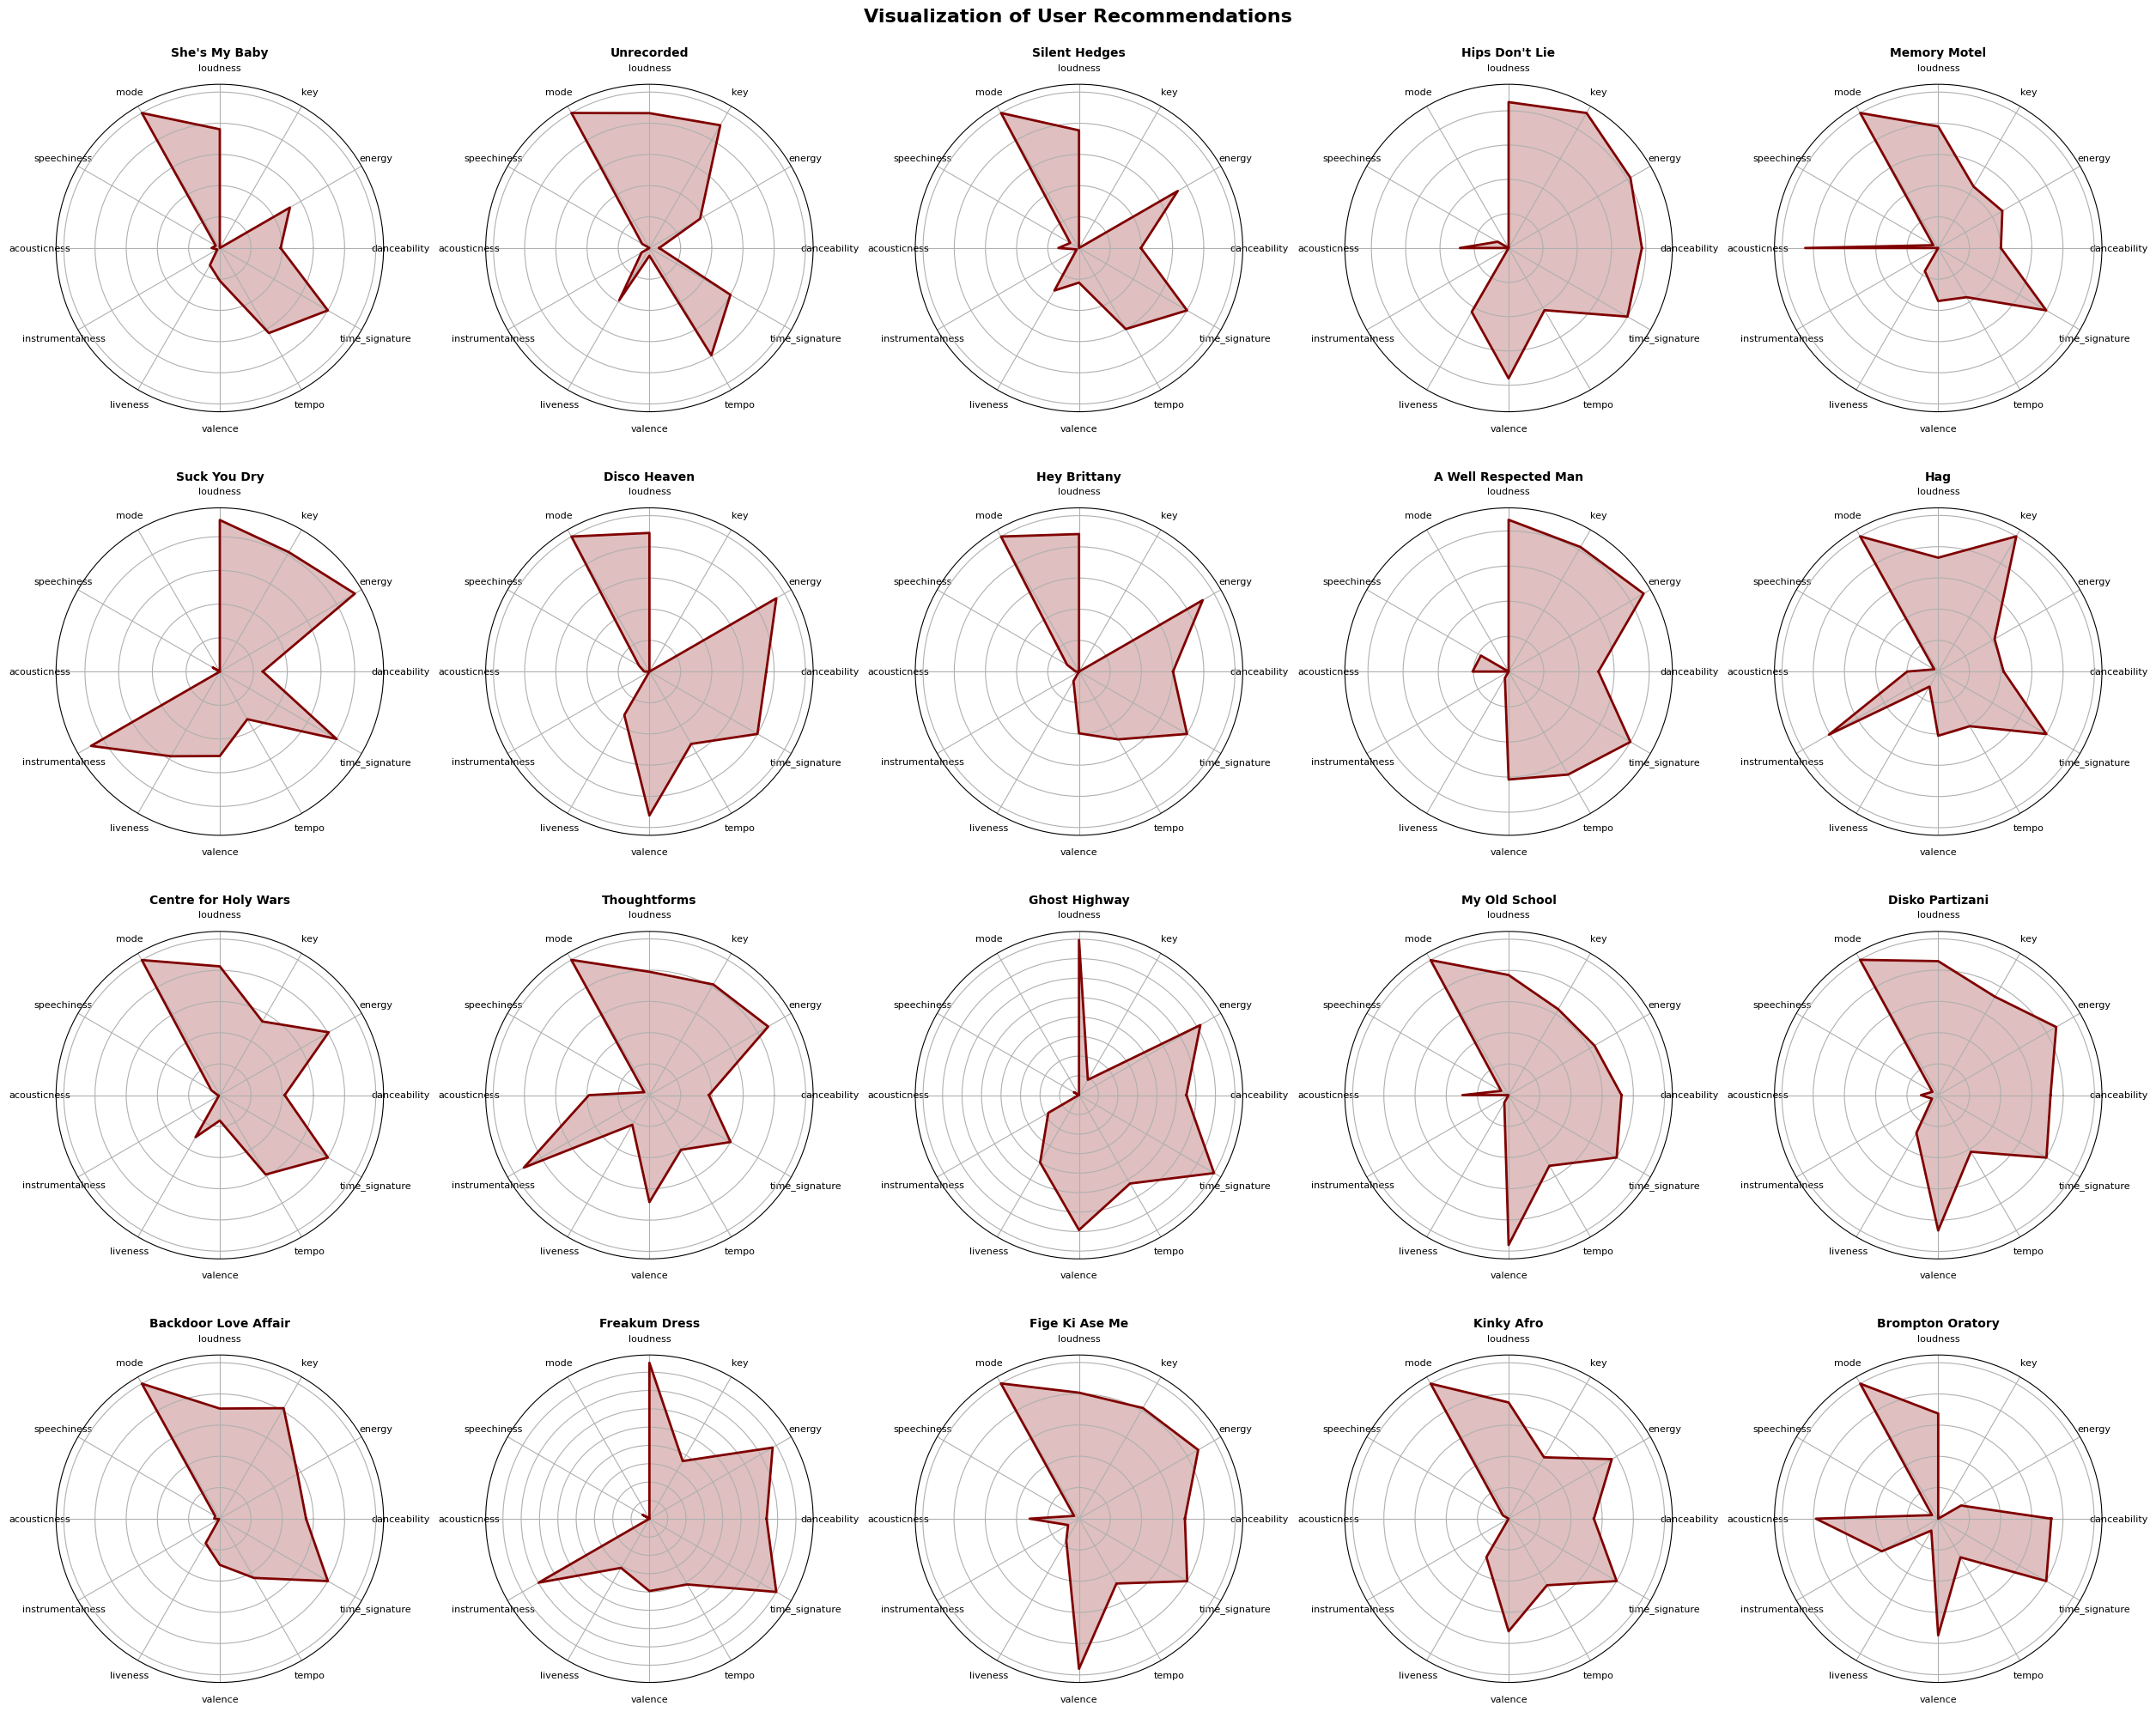

In [177]:
plot_user_recommendation(users=most_listened, features=features)

### **Візуалізація рекомендацій**

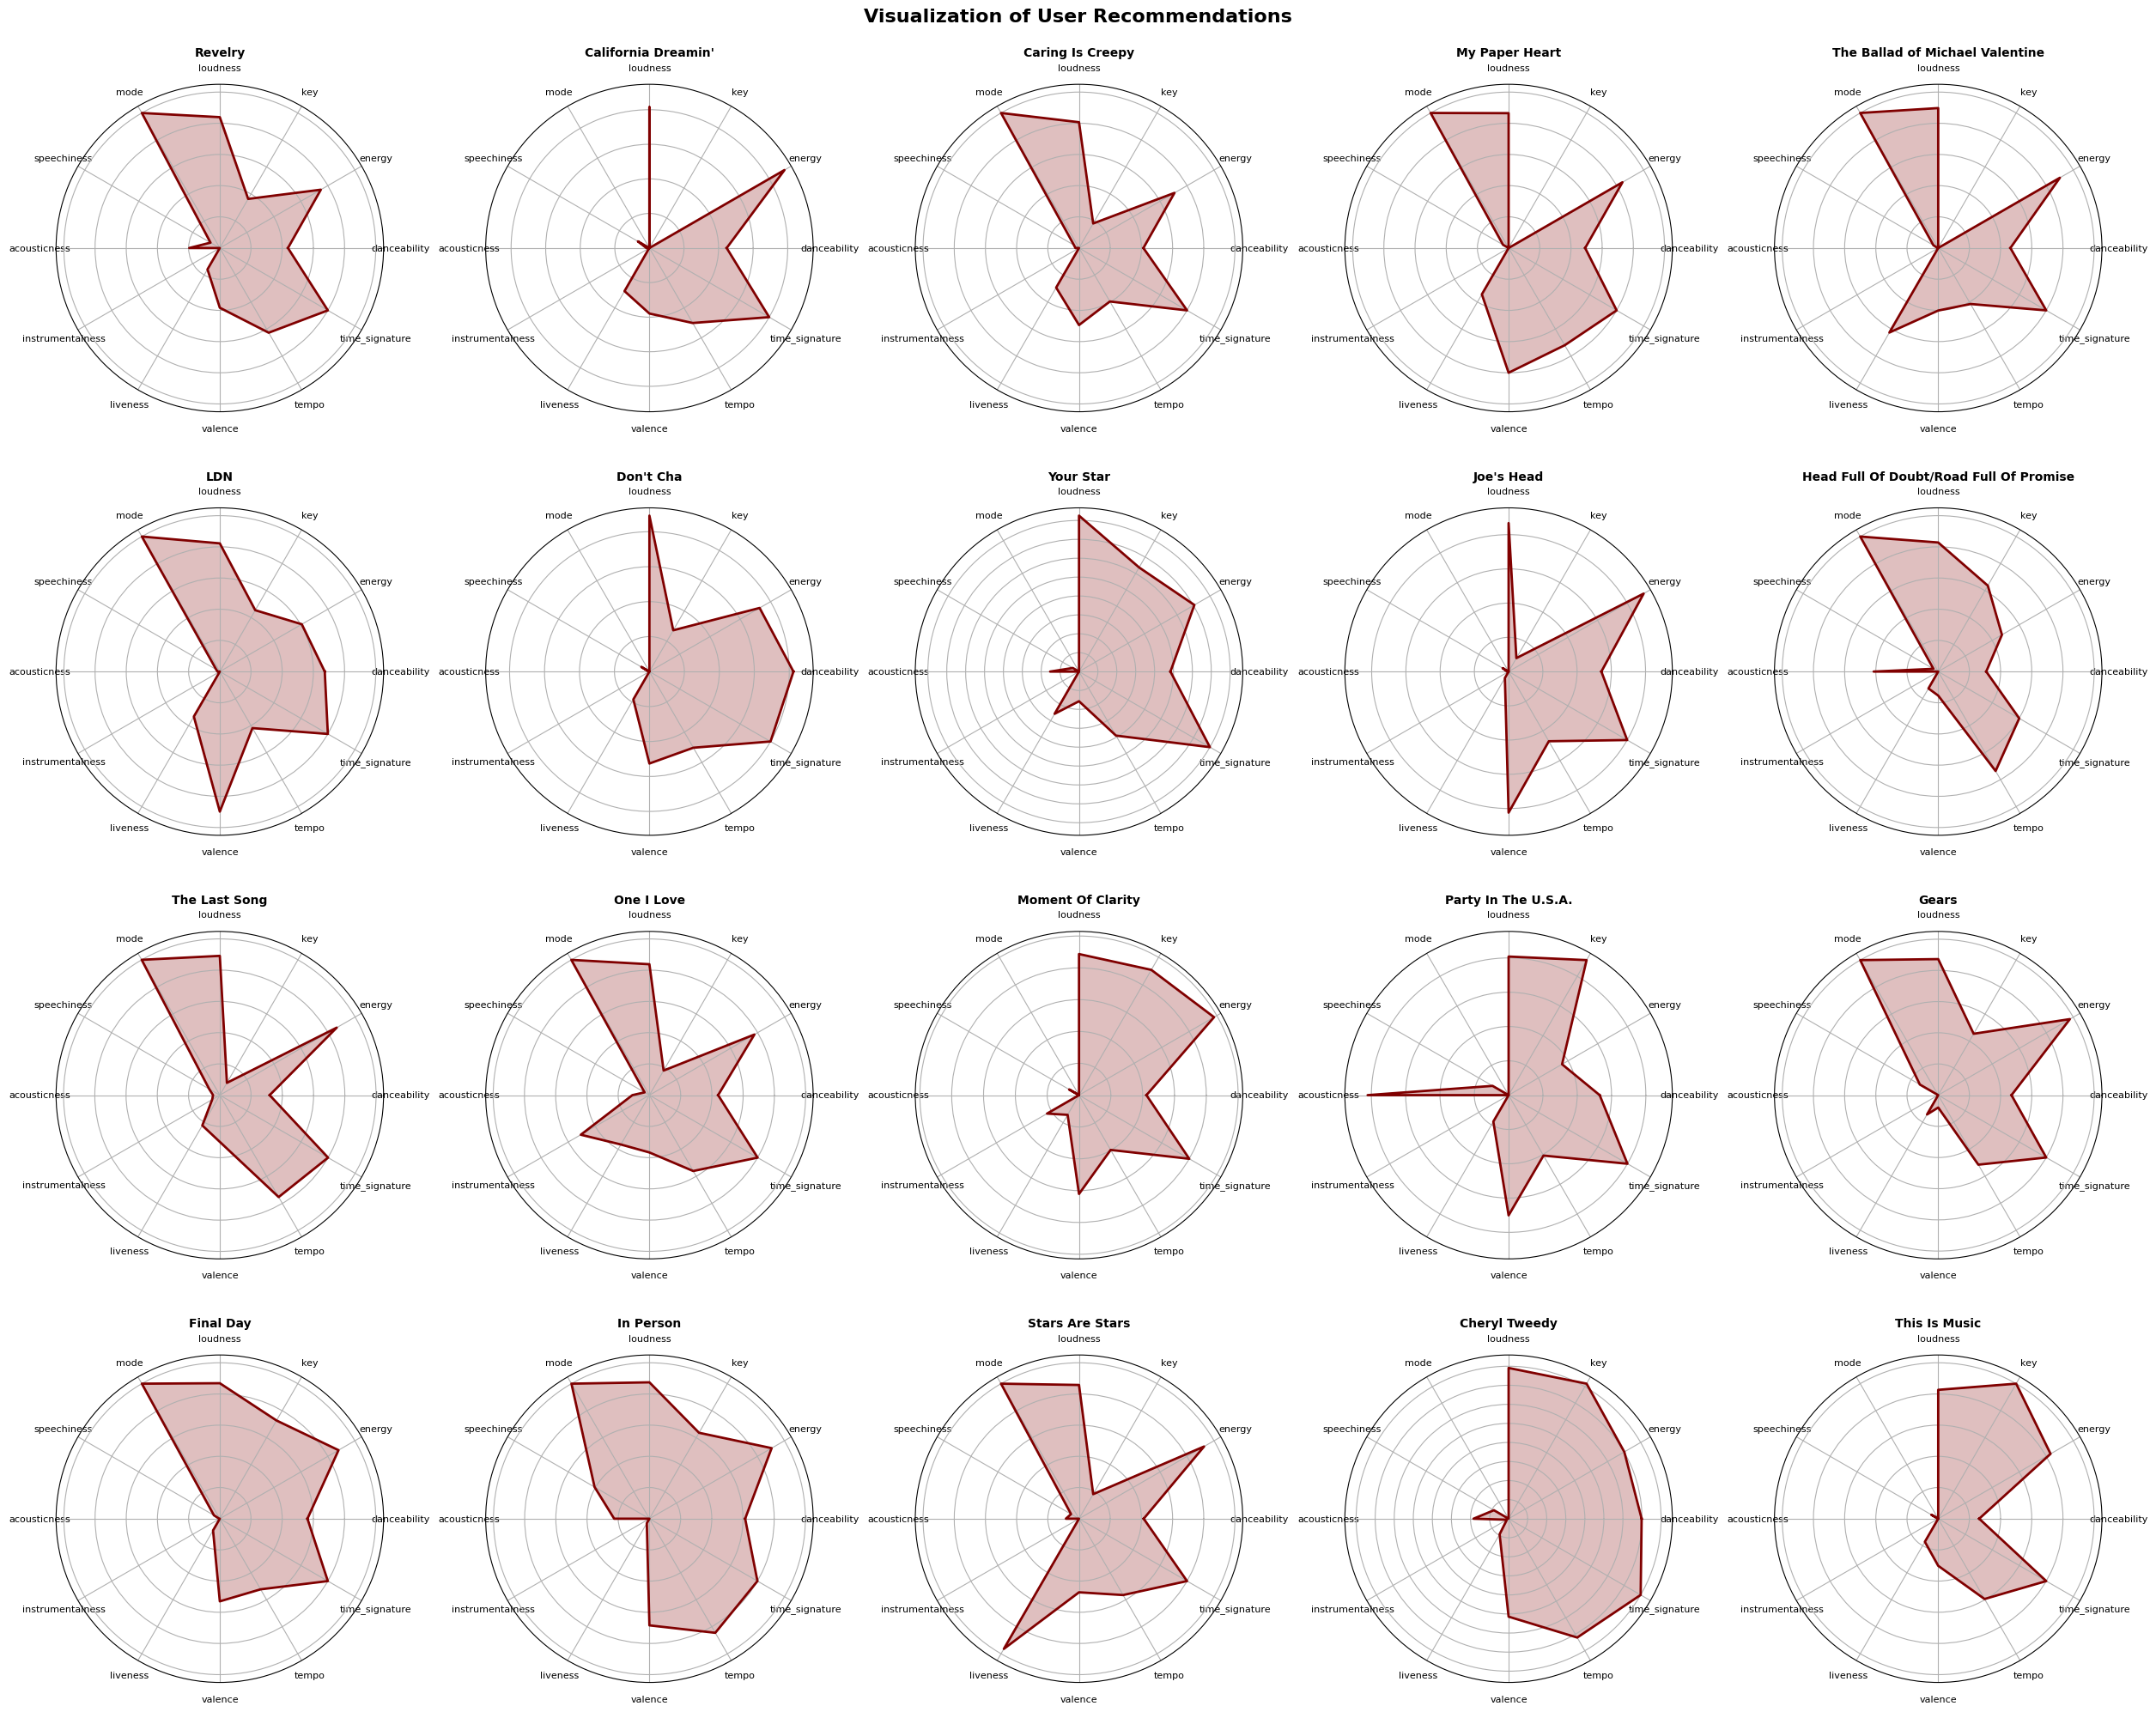

In [178]:
plot_user_recommendation(recommendations, features=features)plot_user_recommendation(recommendations, features=features)

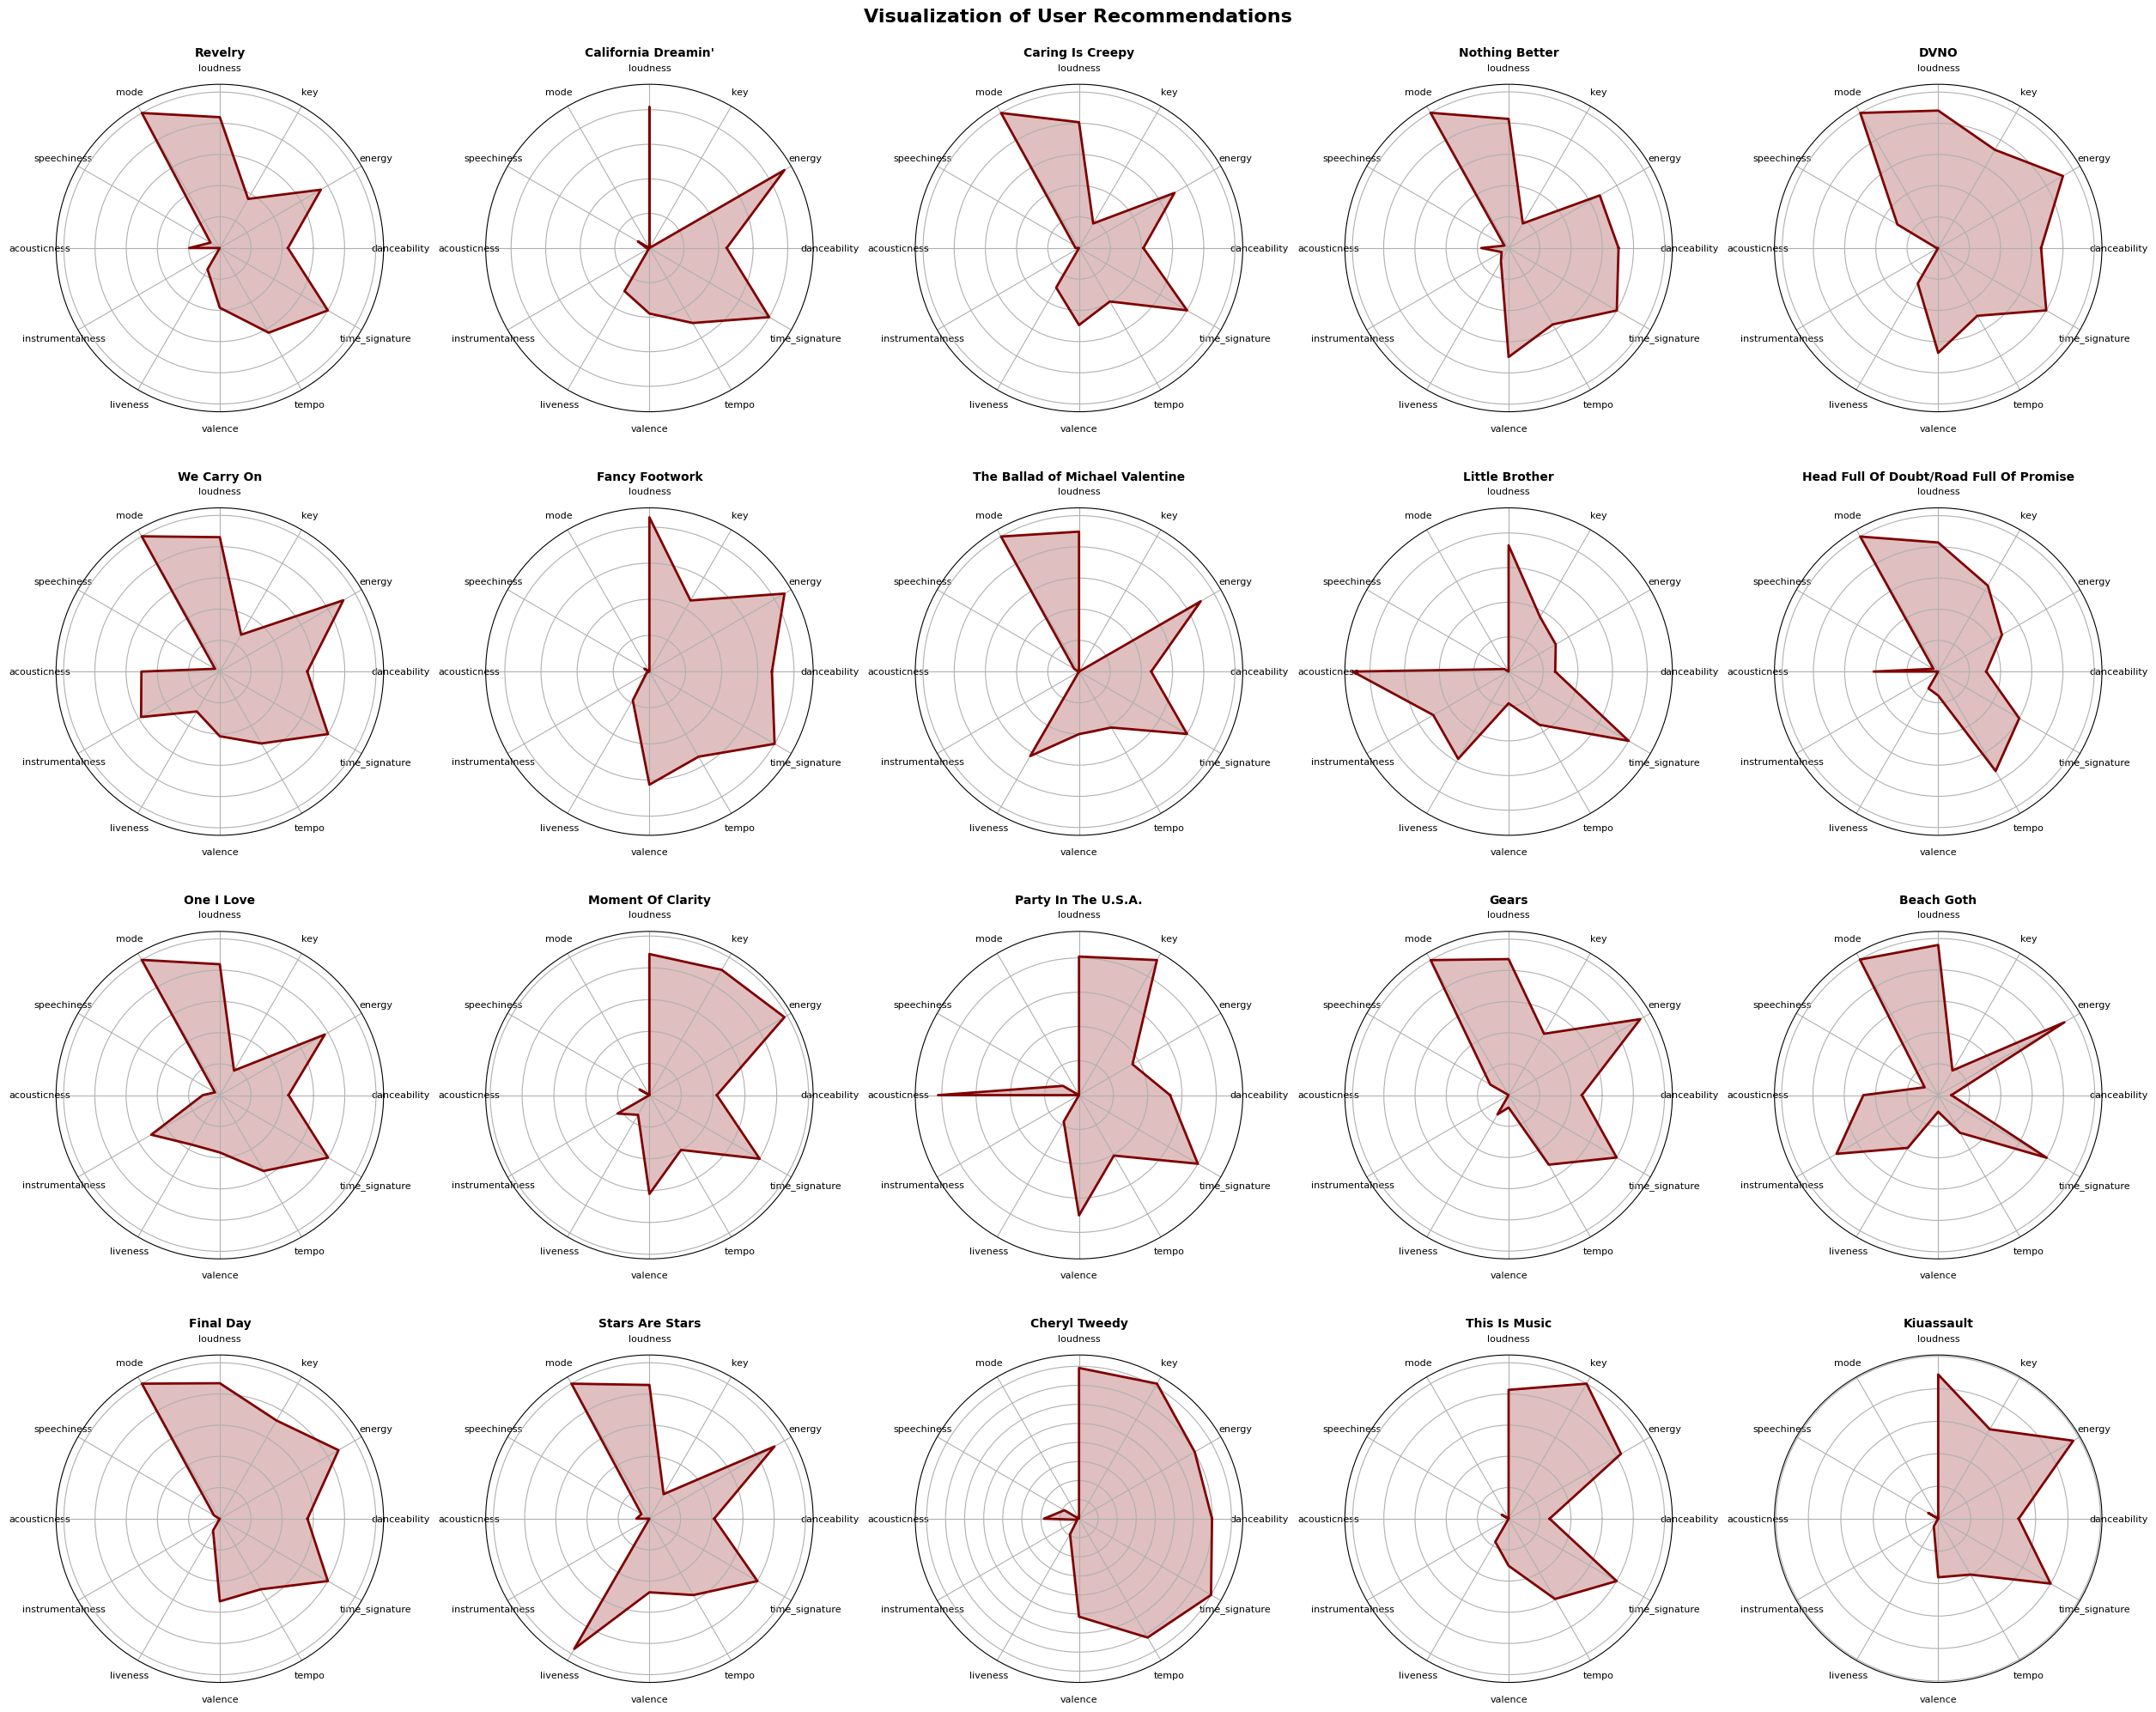

In [179]:
plot_user_recommendation(recommendations_general, features=features)

# **Відображення профілю цього користувача для порівняння**

In [180]:
user_profile = df_profiles[df_profiles.index == ransom_user]

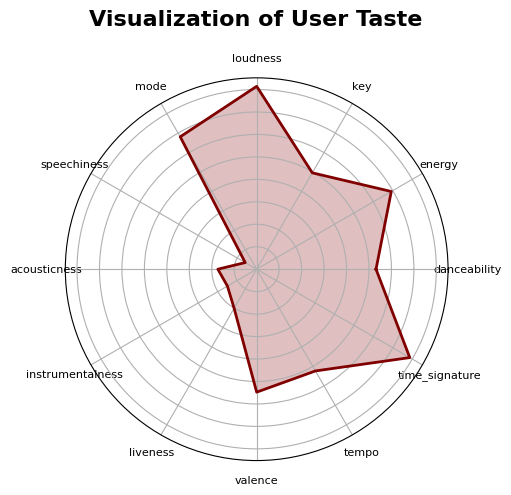

In [181]:
plot_one_user_recommendation(user=df_profiles[df_profiles.index == ransom_user], features=features)

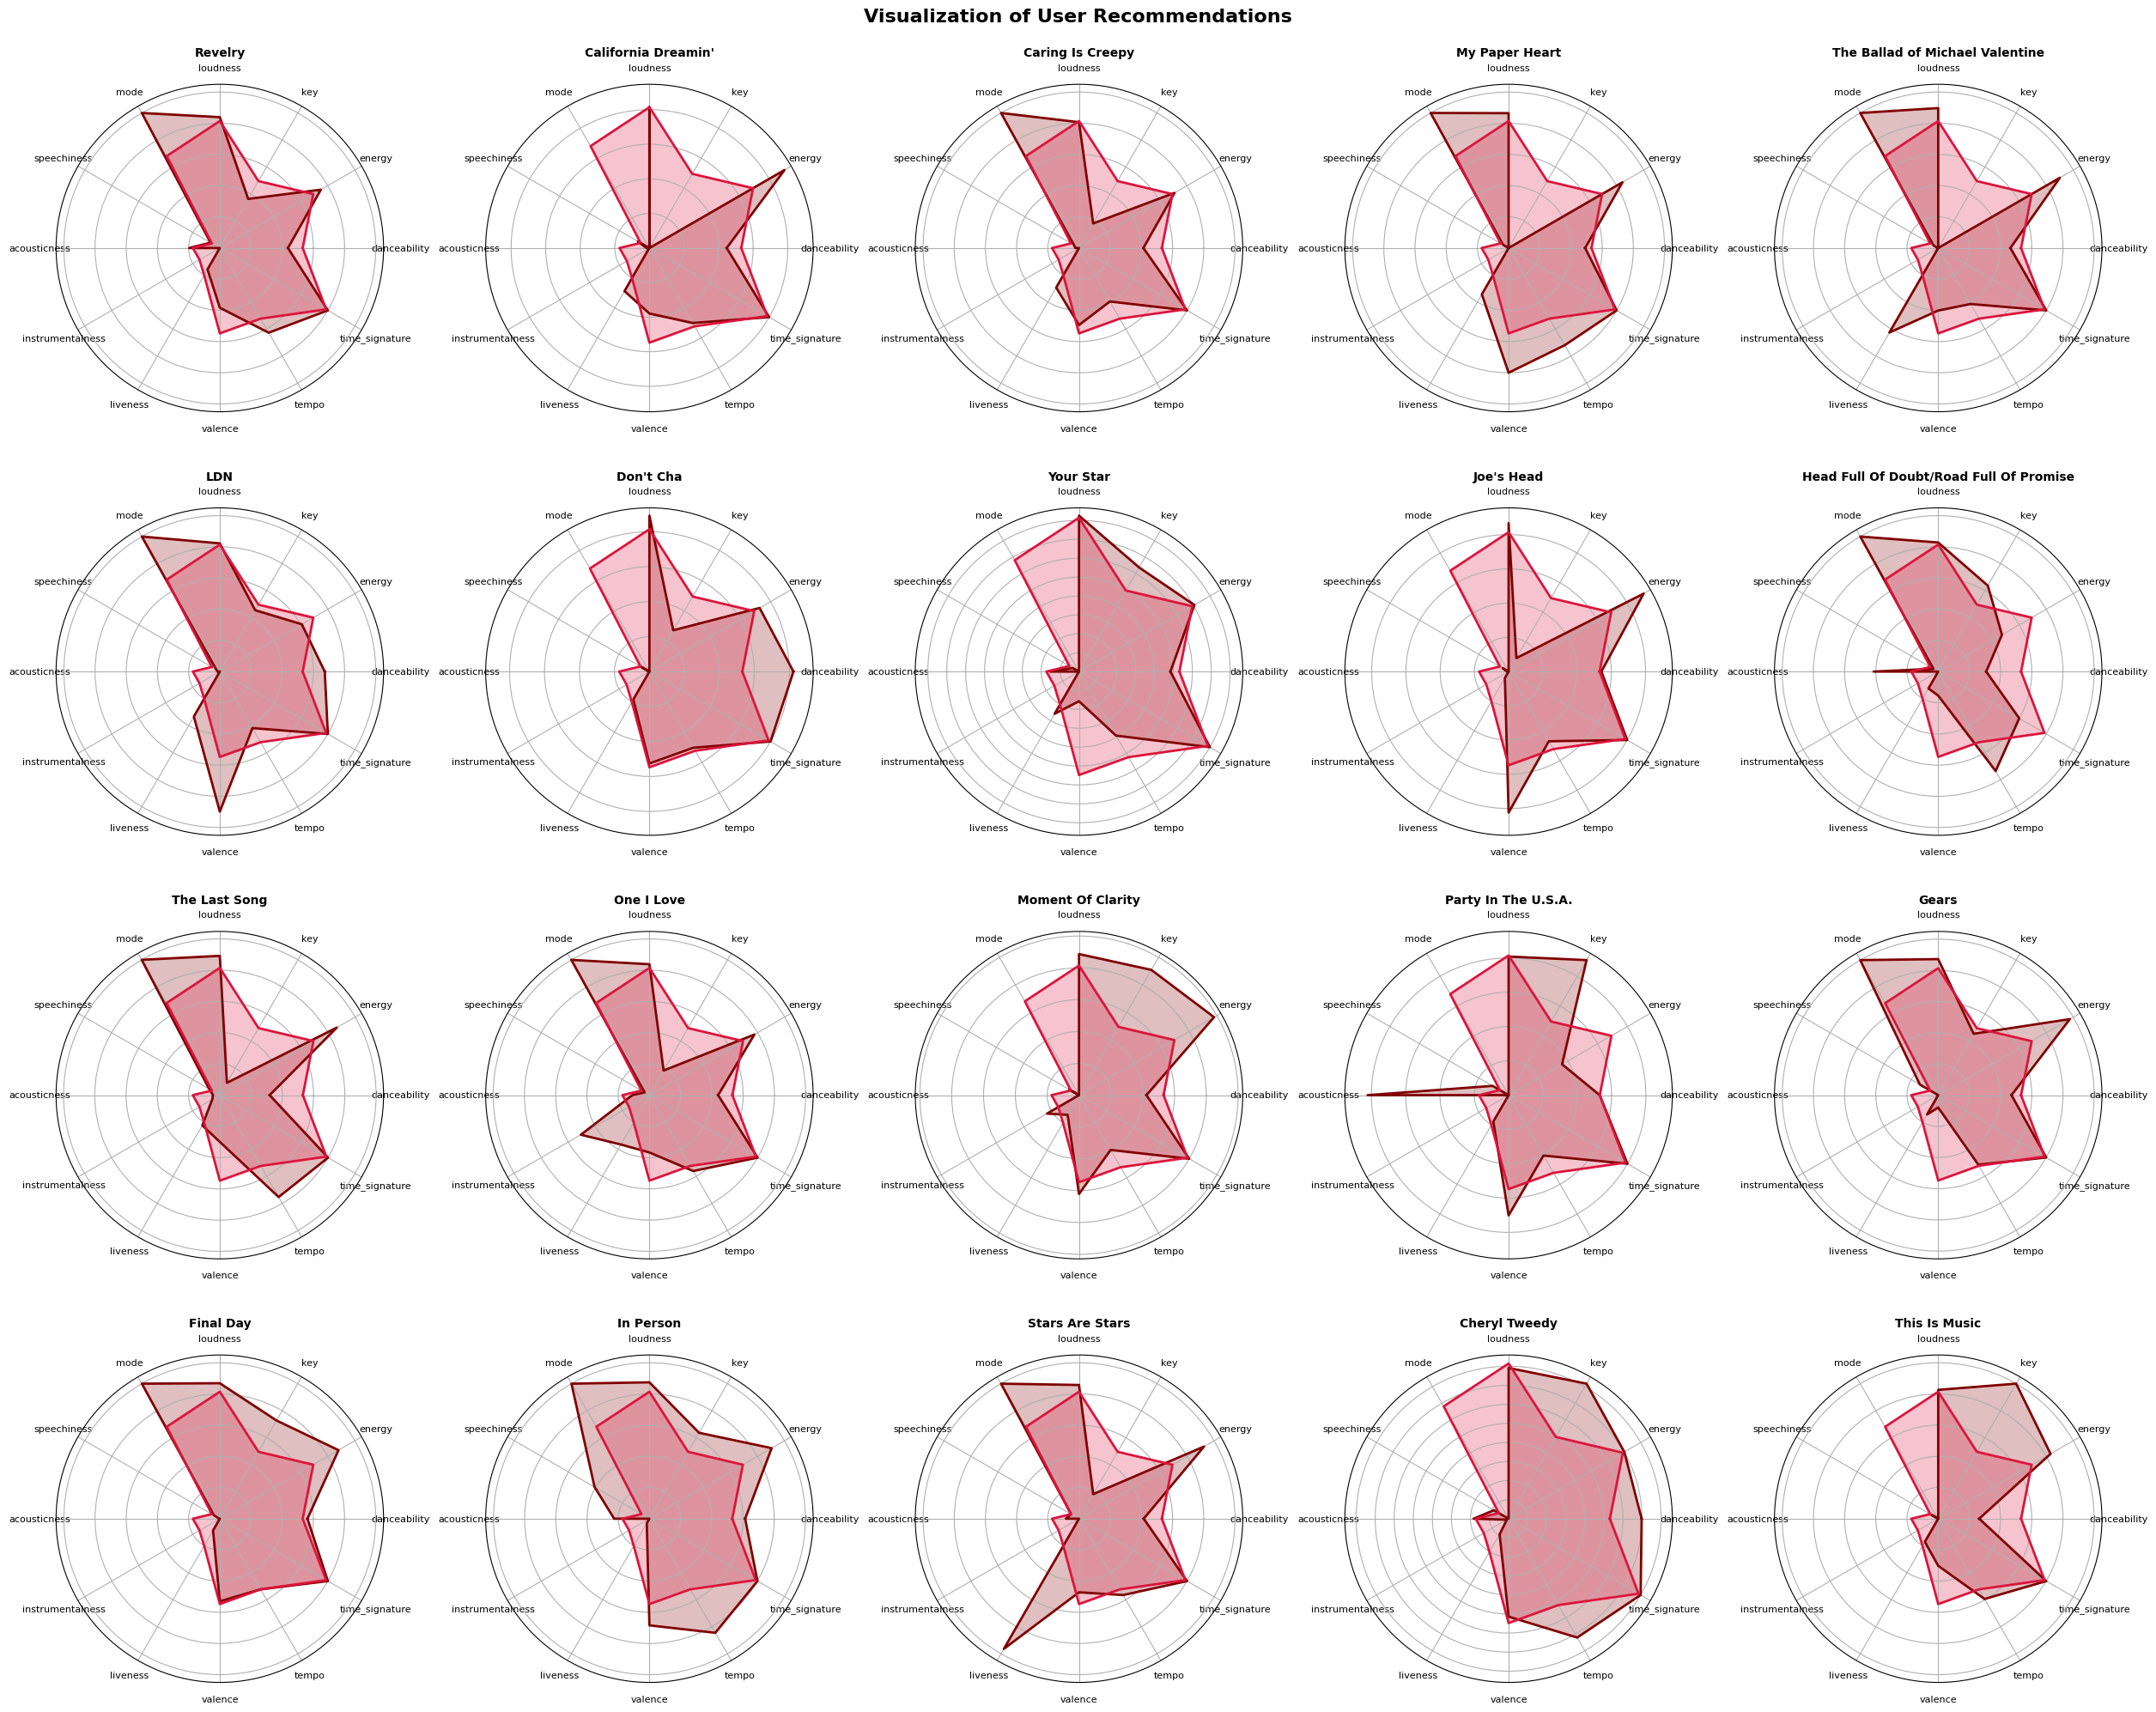

In [182]:
plot_user_recommendation(users=recommendations, features=features, user_profile=df_profiles[df_profiles.index == ransom_user])

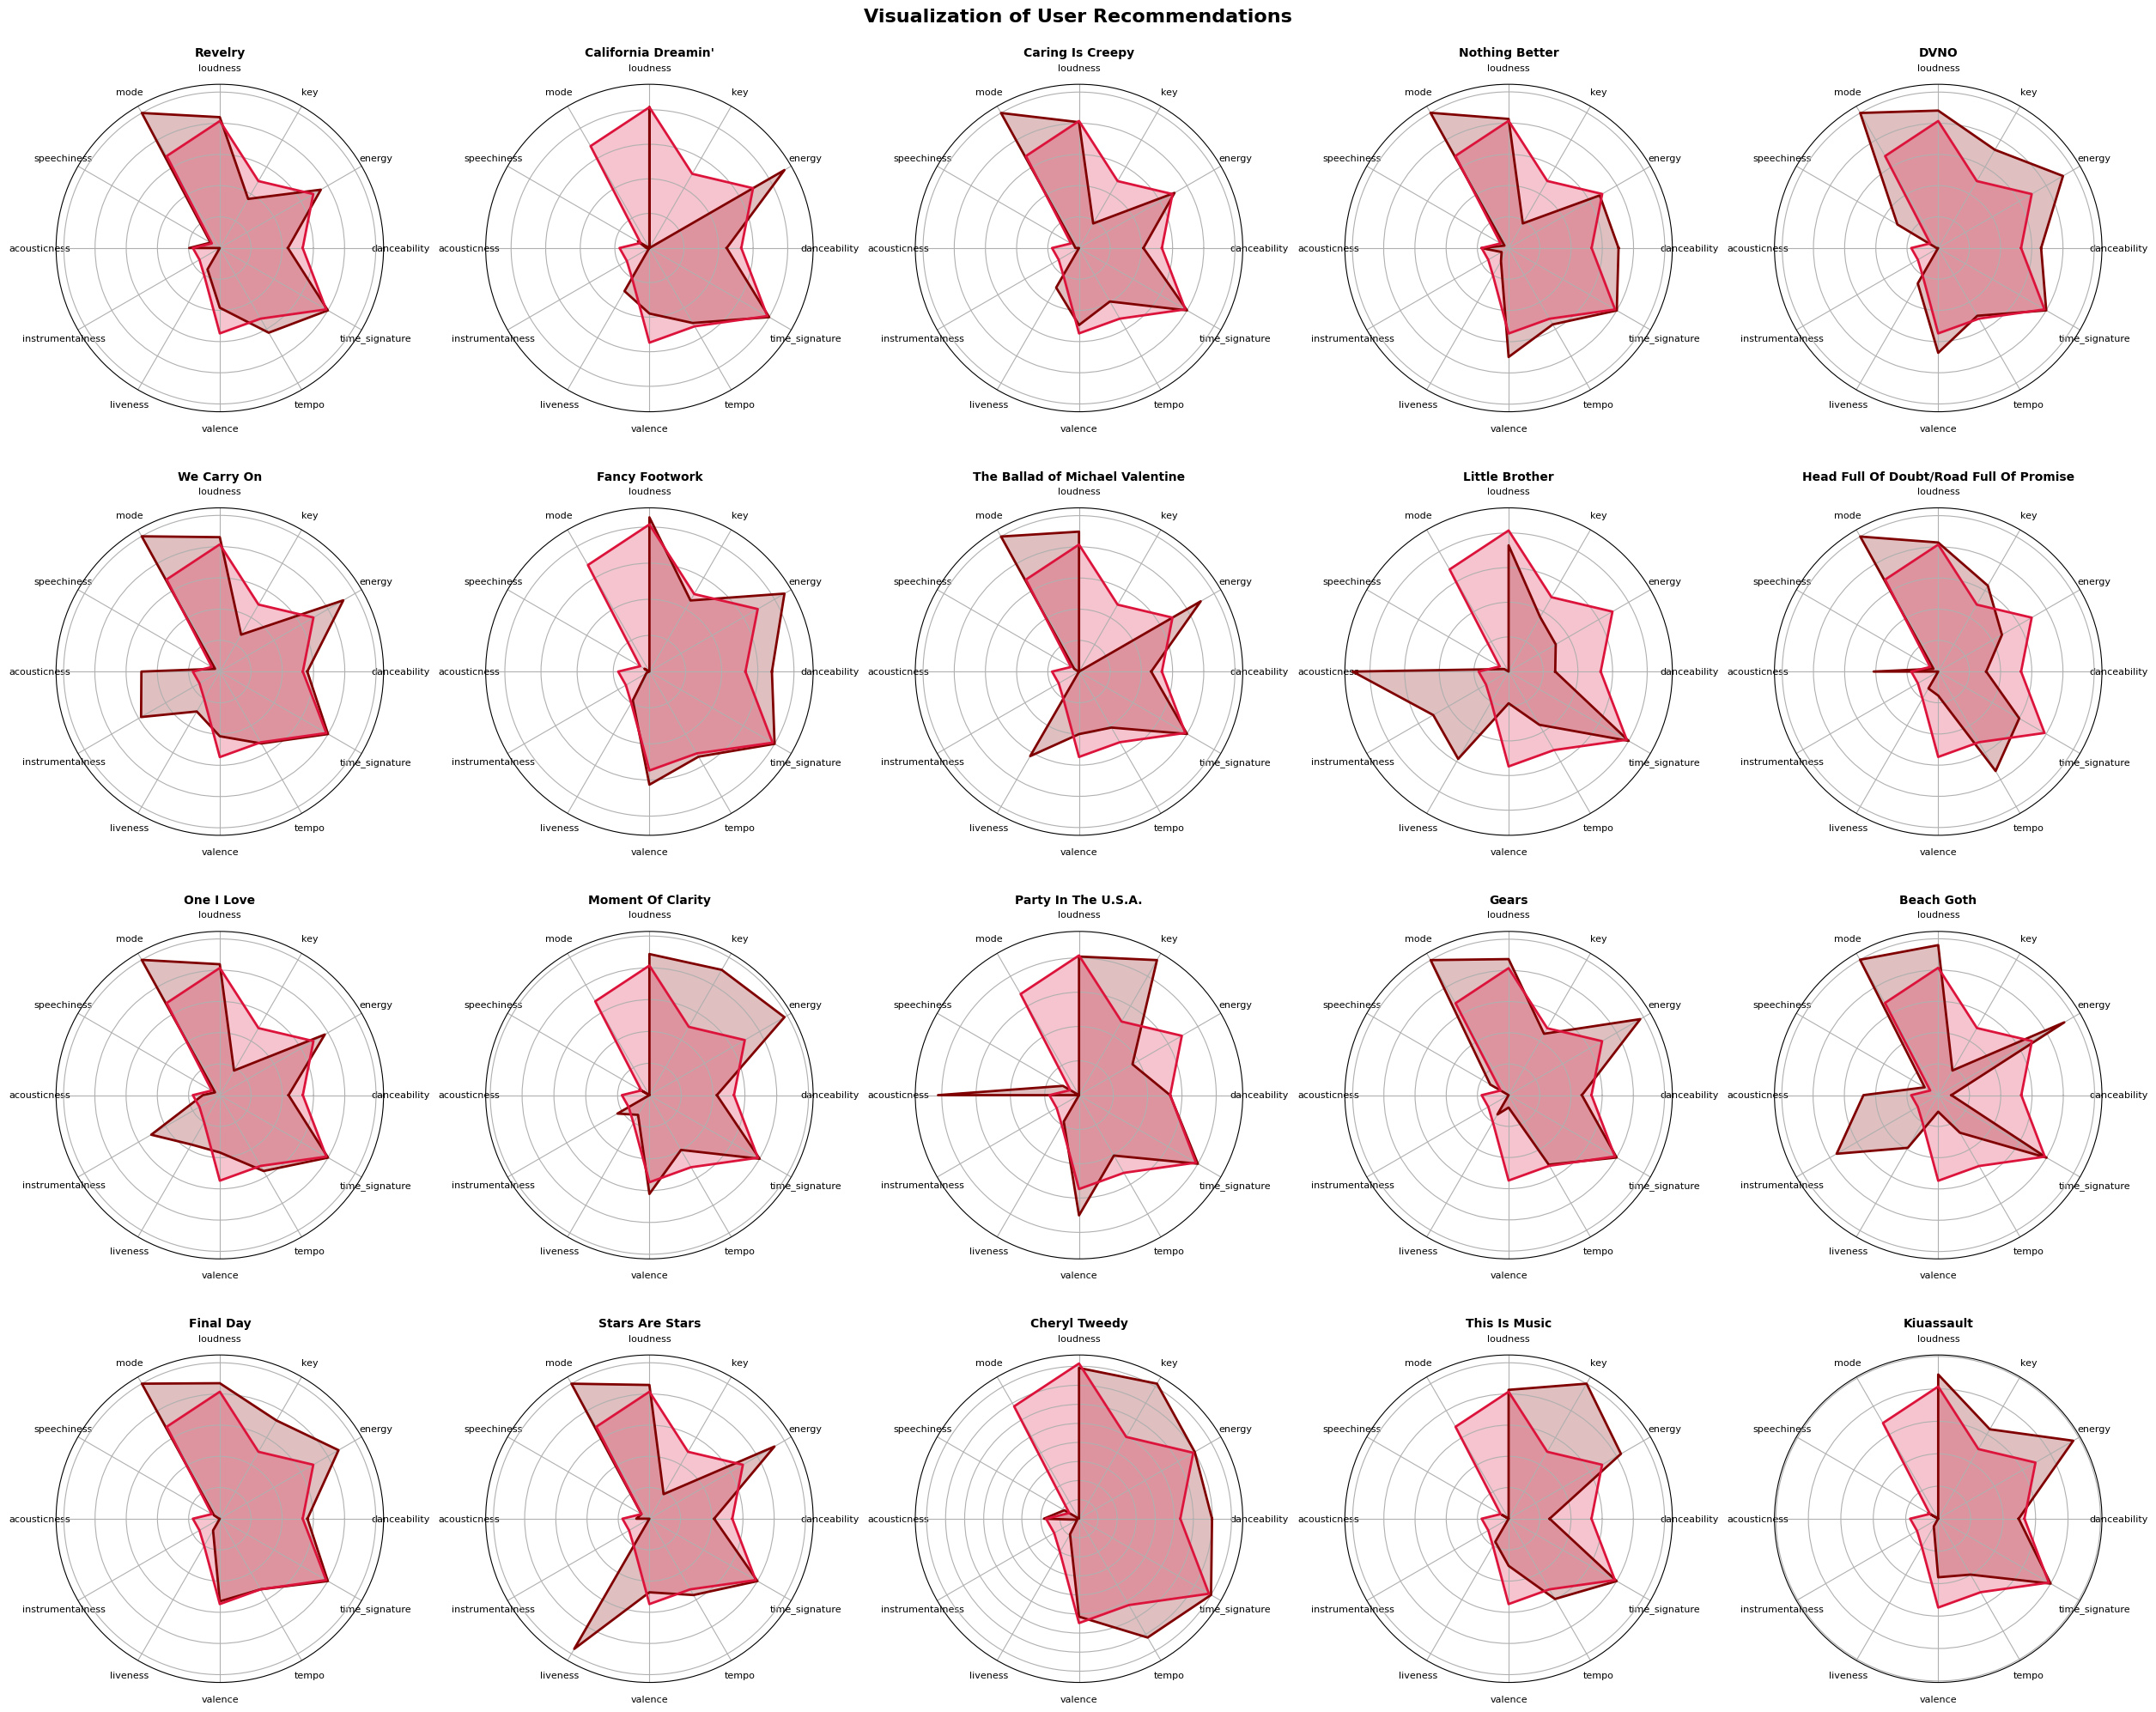

In [183]:
plot_user_recommendation(users=recommendations_general, features=features, user_profile=df_profiles[df_profiles.index == ransom_user])

# **Вимірювання точності (порівняння рекомендацій з профілем користувача)**

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [184]:
def simmilarity(user_profile, list_of_recs, features):
  recs = []
  df = list_of_recs[features]
  for col in df.columns:
    median = df[col].median()
    recs.append(median)
  return {
      'mae': mean_absolute_error(y_true=user_profile[features].T.values, y_pred=recs),
      'mse': mean_squared_error(y_true=user_profile[features].T.values, y_pred=recs),
      'rmse': root_mean_squared_error(y_true=user_profile[features].T.values, y_pred=recs)
  }

In [185]:
with_clusters = simmilarity(user_profile, recommendations, features)
with_clusters

{'mae': 0.0884319807255602,
 'mse': 0.015545186109844155,
 'rmse': 0.12468033569831354}

In [186]:
without_clusters = simmilarity(user_profile, recommendations_general, features)
without_clusters

{'mae': 0.095222763419968,
 'mse': 0.01708267686594628,
 'rmse': 0.1307007148639451}

In [187]:
comparisson = {
    'mae': with_clusters['mae'] - without_clusters['mae'],
    'mse': with_clusters['mse'] - without_clusters['mse'],
    'rmse': with_clusters['rmse'] - without_clusters['rmse']
}

comparisson

{'mae': -0.006790782694407804,
 'mse': -0.001537490756102126,
 'rmse': -0.00602037916563157}

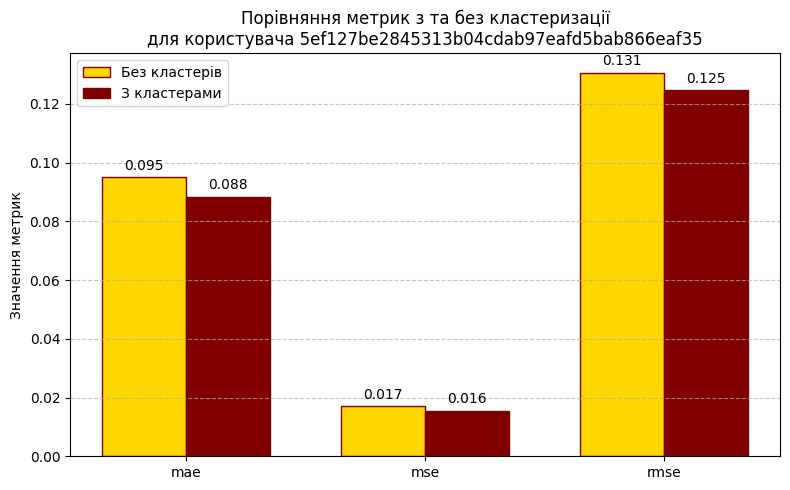

In [190]:
metrics = list(without_clusters.keys())
x = np.arange(len(metrics))

without_values = [without_clusters[metric] for metric in metrics]
with_values = [with_clusters[metric] for metric in metrics]

width = 0.35
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, without_values, width, label='Без кластерів', color='gold', edgecolor='maroon')
bars2 = ax.bar(x + width/2, with_values, width, label='З кластерами', color='maroon', edgecolor='maroon')

ax.set_ylabel('Значення метрик')
ax.set_title(f'Порівняння метрик з та без кластеризації\nдля користувача {ransom_user}')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()